In [1]:
import sys
import pandas as pd
import numpy as np
# import ydata_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('bank-full.csv', delimiter = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.shape

(45211, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Transform Data from Category to Discrete

In [8]:
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['month'] = le.fit_transform(df['month'])
df['contact'] = le.fit_transform(df['contact'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [9]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [10]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
df['y'].value_counts().rename_axis("Y").reset_index(name="Count")

,Y,Count
0,0,39922
1,1,5289


In [13]:
box = px.box(df, x="y", y="age")
box.show()

In [14]:
ageGroup = df[df['y']==1].groupby(['age'])['age'].count().rename_axis("Age").reset_index(name="Count")
ageGroup

,Age,Count
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40
...,...,...
69,87,3
70,90,2
71,92,2
72,93,2


In [15]:
ageGroup.iplot(kind='bar', x="Age", y="Count", title="Age Group", color="dodgerblue")

In [16]:
heat = px.imshow(df.corr(), text_auto=True, aspect="auto", color_continuous_scale='gnbu')
heat.show()

### Split x value & y value

In [17]:
x = df.iloc[:, :-1]
y=df[['y']]

In [18]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [19]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [20]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

#### With Day & Month

[0.0965675  0.05874215 0.02747776 0.03586118 0.00262333 0.09206498
 0.02588176 0.01041434 0.02592654 0.09352767 0.09494432 0.25396451
 0.05842273 0.03975519 0.0230103  0.06081576]


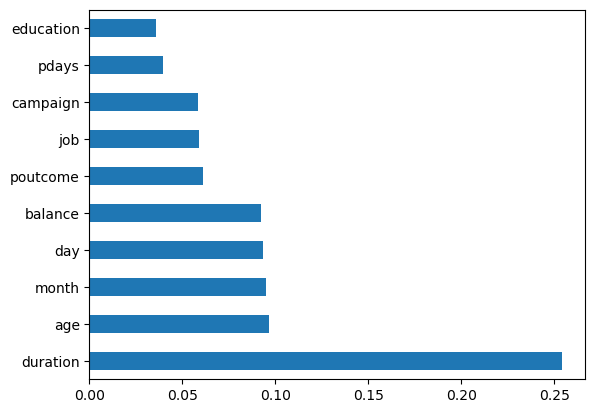

In [21]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [22]:
x1 = x[['education', 'pdays', 'campaign', 'poutcome', 'job', 'balance', 'day', 'month', 'age', 'duration']]
x1.head()

,education,pdays,campaign,poutcome,job,balance,day,month,age,duration
0,2,-1,1,3,4,2143,5,8,58,261
1,1,-1,1,3,9,29,5,8,44,151
2,1,-1,1,3,2,2,5,8,33,76
3,3,-1,1,3,1,1506,5,8,47,92
4,3,-1,1,3,11,1,5,8,33,198


#### Without Day & Month

In [23]:
x = x.drop(['day', 'month'], axis=1)
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

[0.14235197 0.06450721 0.02353974 0.03270683 0.00238345 0.15307337
 0.02386636 0.00920534 0.02423006 0.3110768  0.07116558 0.04606075
 0.0297469  0.06608565]


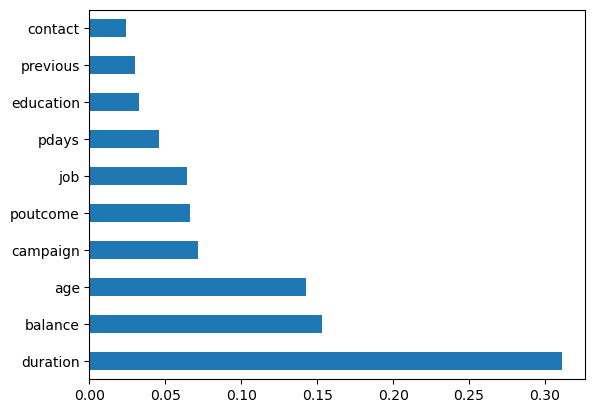

In [24]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [25]:
x2 = x[['contact', 'previous', 'education', 'pdays', 'poutcome', 'job', 'campaign', 'age', 'balance', 'duration']]
x2.head()

,contact,previous,education,pdays,poutcome,job,campaign,age,balance,duration
0,2,0,2,-1,3,4,1,58,2143,261
1,2,0,1,-1,3,9,1,44,29,151
2,2,0,1,-1,3,2,1,33,2,76
3,2,0,3,-1,3,1,1,47,1506,92
4,2,0,3,-1,3,11,1,33,1,198


### Split X & Y data

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, random_state=20)

In [27]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression()

In [28]:
pred1 = model1.predict(x_test)

In [29]:
acc1 = accuracy_score(y_test, pred1)
acc1

0.8900807254229791

In [30]:
report = classification_report(y_test, pred1)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7996
           1       0.60      0.15      0.24      1047

    accuracy                           0.89      9043
   macro avg       0.75      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



In [31]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=20)

In [32]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [33]:
pred2 = model2.predict(x_test)

In [34]:
acc2 = accuracy_score(y_test, pred2)
acc2

0.8922923808470641

#### Model 2 is Better

In [35]:
report = classification_report(y_test, pred2)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7996
           1       0.63      0.17      0.26      1047

    accuracy                           0.89      9043
   macro avg       0.77      0.58      0.60      9043
weighted avg       0.87      0.89      0.86      9043

